In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

data = pd.read_excel("historias.xlsx")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
display(data.tail(5))

,historia_id,infiel_id,primer_nombre,iniciales_apellidos,sexo,edad,provincia,canton,parroquia,historia_filtrada,tiempo_meses,tipo_infiel,reputacion_tipo,reputacion_votos,total_reacciones,fecha_registro_timestamp,reaccion_PISHCOTA,reaccion_QUEMONA,reaccion_DESGRACIADO,reaccion_PRINCIPIANTE,reaccion_SINVERGUENZA,reaccion_MOJIGATA,reaccion_SANGRONA,reaccion_MAESTRO,reaccion_PICADA,reaccion_MACHO_ALFA
1677,693af36d386844dae76e76c6,693af36d386844dae76e76c4,Desconocido,KRMC,Hombre,0,GUAYAS,SAN JACINTO DE YAGUACHI,SAN JACINTO DE YAGUACHI,Me fue infiel con una chica de tropac y la tie...,1,Infiel primerizo,Infiel primerizo,1,3,1765030200000,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1678,693af36d386844dae76e76c2,693af36c386844dae76e76c0,Desconocido,JJZZ,Hombre,0,ESMERALDAS,QUININDE,LA UNION,Me fue infiel con mi mejor amiga 💔,1,Infiel primerizo,Infiel primerizo,1,1,1765002450000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1679,693af36c386844dae76e76be,693af36c386844dae76e76bc,Desconocido,CAJB,Hombre,0,GUAYAS,BALAO,BALAO,Resulta que mi esposo me había estado engañand...,1,Infiel primerizo,Infiel primerizo,1,2,1764955320000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1680,693af36c386844dae76e76b8,693af36c386844dae76e76b5,Desconocido,LCMC,Mujer,0,LOJA,LOJA,LOJA,Resulta que se fue a un viaje en de deportes e...,1,Infiel primerizo,Infiel primerizo,1,2,1764954818000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
1681,693af37a386844dae76e8101,693af37a386844dae76e80ff,Desconocido,KDDP,Mujer,0,AZUAY,CUENCA,SAN SEBASTIAN,Todo el tiempo chateaba “con amigos”,1,Infiel primerizo,Infiel primerizo,1,1,1001894400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [5]:
data['provincia'].nunique()

26

In [6]:
data['provincia'].unique()

array(['IMBABURA', 'PICHINCHA', 'EL ORO', 'ZAMORA CHINCHIPE', 'LOS RIOS',
       'AZUAY', 'CHIMBORAZO', 'LOJA', 'MANABI', 'GUAYAS', 'COTOPAXI',
       'CAÑAR', 'SANTO DOMINGO DE LOS TSÁCHILAS', 'PASTAZA', 'TUNGURAHUA',
       'NAPO', 'SUCUMBIOS', 'ESMERALDAS', 'SANTA ELENA', 'GALAPAGOS',
       'ORELLANA', 'BOLIVAR', 'CARCHI', 'MORONA SANTIAGO', 'SUCUMBÍOS',
       'MANABÍ'], dtype=object)

In [7]:
data['edad'].unique()

array([22, 18, 23, 27, 29, 39, 35, 37, 32, 28, 26, 30, 21, 45, 20, 56, 47,
       50, 40, 90, 25, 19, 24, 34, 31, 38, 46, 43, 42, 60, 36, 54, 57, 33,
       44, 55, 52, 41, 15, 82, 48, 17, 16, 61, 14, 12,  0])

In [8]:
data.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['historia_id', 'infiel_id', 'primer_nombre', 'iniciales_apellidos',
       'sexo', 'edad', 'provincia', 'canton', 'parroquia', 'historia_filtrada',
       'tiempo_meses', 'tipo_infiel', 'reputacion_tipo', 'reputacion_votos',
       'total_reacciones', 'fecha_registro_timestamp', 'reaccion_PISHCOTA',
       'reaccion_QUEMONA', 'reaccion_DESGRACIADO', 'reaccion_PRINCIPIANTE',
       'reaccion_SINVERGUENZA', 'reaccion_MOJIGATA', 'reaccion_SANGRONA',
       'reaccion_MAESTRO', 'reaccion_PICADA', 'reaccion_MACHO_ALFA'],
      dtype='object')>

In [9]:

data['provincia'] = data['provincia'].str.upper().str.strip()

# Reemplazar duplicados
replazar = {
    'SUCUMBIOS': 'SUCUMBÍOS',
    'MANABI': 'MANABÍ',
    'GALAPAGOS': 'GALÁPAGOS',
    'BOLIVAR': 'BOLÍVAR'
}

data['provincia'] = data['provincia'].replace(replazar)

# Verificar
print(data['provincia'].unique())
print(f"Total provincias únicas: {data['provincia'].nunique()}")  

['IMBABURA' 'PICHINCHA' 'EL ORO' 'ZAMORA CHINCHIPE' 'LOS RIOS' 'AZUAY'
 'CHIMBORAZO' 'LOJA' 'MANABÍ' 'GUAYAS' 'COTOPAXI' 'CAÑAR'
 'SANTO DOMINGO DE LOS TSÁCHILAS' 'PASTAZA' 'TUNGURAHUA' 'NAPO'
 'SUCUMBÍOS' 'ESMERALDAS' 'SANTA ELENA' 'GALÁPAGOS' 'ORELLANA' 'BOLÍVAR'
 'CARCHI' 'MORONA SANTIAGO']
Total provincias únicas: 24


In [10]:
def estandarizar_provincias_ecuador(data, columna_provincia='provincia'):
  
    # Diccionario de mapeo
    mapeo_provincias = {
        # Variaciones de AZUAY
        'AZUAY': 'AZUAY',
        'azuay': 'AZUAY',
        'Azuay': 'AZUAY',
        
        # Variaciones de BOLIVAR
        'BOLIVAR': 'BOLÍVAR',
        'BOLÍVAR': 'BOLÍVAR',
        'Bolivar': 'BOLÍVAR',
        'Bolívar': 'BOLÍVAR',
        'bolivar': 'BOLÍVAR',
        
        # Variaciones de CAÑAR
        'CAÑAR': 'CAÑAR',
        'CANAR': 'CAÑAR',
        'Cañar': 'CAÑAR',
        'Canar': 'CAÑAR',
        
        # Variaciones de CARCHI
        'CARCHI': 'CARCHI',
        'Carchi': 'CARCHI',
        
        # Variaciones de COTOPAXI
        'COTOPAXI': 'COTOPAXI',
        'Cotopaxi': 'COTOPAXI',
        
        # Variaciones de CHIMBORAZO
        'CHIMBORAZO': 'CHIMBORAZO',
        'Chimborazo': 'CHIMBORAZO',
        
        # Variaciones de EL ORO
        'EL ORO': 'EL ORO',
        'EL ORO ': 'EL ORO',
        'El Oro': 'EL ORO',
        'ELORO': 'EL ORO',
        'ORO': 'EL ORO',
        
        # Variaciones de ESMERALDAS
        'ESMERALDAS': 'ESMERALDAS',
        'Esmeraldas': 'ESMERALDAS',
        
        # Variaciones de GALAPAGOS
        'GALAPAGOS': 'GALÁPAGOS',
        'GALÁPAGOS': 'GALÁPAGOS',
        'Galapagos': 'GALÁPAGOS',
        
        # Variaciones de GUAYAS
        'GUAYAS': 'GUAYAS',
        'Guayas': 'GUAYAS',
        'GUAYAQUIL': 'GUAYAS',
        
        # Variaciones de IMBABURA
        'IMBABURA': 'IMBABURA',
        'Imbabura': 'IMBABURA',
        
        # Variaciones de LOJA
        'LOJA': 'LOJA',
        'Loja': 'LOJA',
        
        # Variaciones de LOS RIOS
        'LOS RIOS': 'LOS RÍOS',
        'LOS RÍOS': 'LOS RÍOS',
        'Los Rios': 'LOS RÍOS',
        'Los Ríos': 'LOS RÍOS',
        'LOSRIOS': 'LOS RÍOS',
        
        # Variaciones de MANABI
        'MANABI': 'MANABÍ',
        'MANABÍ': 'MANABÍ',
        'Manabi': 'MANABÍ',
        'Manabí': 'MANABÍ',
        
        # Variaciones de MORONA SANTIAGO
        'MORONA SANTIAGO': 'MORONA SANTIAGO',
        'Morona Santiago': 'MORONA SANTIAGO',
        
        # Variaciones de NAPO
        'NAPO': 'NAPO',
        'Napo': 'NAPO',
        
        # Variaciones de ORELLANA
        'ORELLANA': 'ORELLANA',
        'Orellana': 'ORELLANA',
        
        # Variaciones de PASTAZA
        'PASTAZA': 'PASTAZA',
        'Pastaza': 'PASTAZA',
        
        # Variaciones de PICHINCHA
        'PICHINCHA': 'PICHINCHA',
        'Pichincha': 'PICHINCHA',
        'QUITO': 'PICHINCHA',
        
        # Variaciones de SANTA ELENA
        'SANTA ELENA': 'SANTA ELENA',
        'Santa Elena': 'SANTA ELENA',
        'SANTAGELENA': 'SANTA ELENA',
        
        # Variaciones de SANTO DOMINGO
        'SANTO DOMINGO': 'SANTO DOMINGO DE LOS TSÁCHILAS',
        'SANTO DOMINGO DE LOS TSACHILAS': 'SANTO DOMINGO DE LOS TSÁCHILAS',
        'SANTO DOMINGO DE LOS TSÁCHILAS': 'SANTO DOMINGO DE LOS TSÁCHILAS',
        'Santo Domingo': 'SANTO DOMINGO DE LOS TSÁCHILAS',
        'STO DOMINGO': 'SANTO DOMINGO DE LOS TSÁCHILAS',
        
        # Variaciones de SUCUMBIOS
        'SUCUMBIOS': 'SUCUMBÍOS',
        'SUCUMBÍOS': 'SUCUMBÍOS',
        'Sucumbios': 'SUCUMBÍOS',
        
        # Variaciones de TUNGURAHUA
        'TUNGURAHUA': 'TUNGURAHUA',
        'Tungurahua': 'TUNGURAHUA',
        
        # Variaciones de ZAMORA CHINCHIPE
        'ZAMORA CHINCHIPE': 'ZAMORA CHINCHIPE',
        'Zamora Chinchipe': 'ZAMORA CHINCHIPE',
        
        # Valores especiales
        '': 'SIN ESPECIFICAR',
        'SIN NOMBRE': 'SIN ESPECIFICAR',
        'N/A': 'SIN ESPECIFICAR',
        'NA': 'SIN ESPECIFICAR',
        'NO ESPECIFICADO': 'SIN ESPECIFICAR',
        'NO APLICA': 'SIN ESPECIFICAR',
        'NAN': 'SIN ESPECIFICAR',
        'NONE': 'SIN ESPECIFICAR',
    }
    
    def limpiar_provincia(nombre):
        if pd.isna(nombre):
            return 'SIN ESPECIFICAR'
        nombre_str = str(nombre).strip().upper()
        
        return mapeo_provincias.get(nombre_str, nombre_str)
    
    if columna_provincia not in data.columns:
        print(f"Error: La columna '{columna_provincia}' no existe en el DataFrame")
        print(f"Columnas disponibles: {list(data.columns)}")
        return data
    
    data[columna_provincia] = data[columna_provincia].apply(limpiar_provincia)
    return data

In [11]:
data = estandarizar_provincias_ecuador(data)

In [12]:
data['fecha_registro_timestamp'] = pd.to_datetime(
    data['fecha_registro_timestamp'], 
    unit='ms'
)
data['fecha'] = data['fecha_registro_timestamp'].dt.strftime('%d/%m/%Y')
print(data[['fecha_registro_timestamp', 'fecha']].head())


  fecha_registro_timestamp       fecha
0  2026-01-05 23:14:48.528  05/01/2026
1  2026-01-05 22:54:15.114  05/01/2026
2  2026-01-05 21:27:49.238  05/01/2026
3  2026-01-05 21:25:19.056  05/01/2026
4  2026-01-05 20:27:38.682  05/01/2026


In [13]:
columnas_eliminar = [
    'historia_id',           # ID interno, no aporta a visualización
    'infiel_id',             # ID interno, redundante
    'fecha_registro_timestamp'  # Redundante
]
data = data.drop(columns=columnas_eliminar)

In [14]:
data.sample(6)

,primer_nombre,iniciales_apellidos,sexo,edad,provincia,canton,parroquia,historia_filtrada,tiempo_meses,tipo_infiel,reputacion_tipo,reputacion_votos,total_reacciones,reaccion_PISHCOTA,reaccion_QUEMONA,reaccion_DESGRACIADO,reaccion_PRINCIPIANTE,reaccion_SINVERGUENZA,reaccion_MOJIGATA,reaccion_SANGRONA,reaccion_MAESTRO,reaccion_PICADA,reaccion_MACHO_ALFA,fecha
1670,Desconocido,JMCE,Hombre,0,GUAYAS,GUAYAQUIL,GUAYAQUIL,Es un pobre perro el infeliz es casado y a las...,1,Infiel primerizo,Infiel primerizo,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/12/2025
1513,Desconocido,NN,Mujer,0,EL ORO,EL GUABO,EL GUABO,2025-12-09 18:22:50,1,Infiel primerizo,Infiel primerizo,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09/12/2025
1475,Desconocido,DJMA,Hombre,0,COTOPAXI,LA MANA,LA MANA,Me engaño con una chica del Ra**** y la dejó ...,1,Infiel primerizo,Infiel primerizo,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09/12/2025
461,JANIO,NU,Hombre,17,EL ORO,MACHALA,MACHALA,Esta con otra teniendo novia\nY le gustan. Me...,1,Extremadamente infiel (Warmijillo),Extremadamente infiel (Warmijillo),1,2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,11/12/2025
528,Desconocido,María Ximena Sornoza Rodríguez,Mujer,0,MANABÍ,24 DE MAYO,NOBOA,Es una chica manipuladora que actual como niña...,1,Infiel primerizo,Infiel primerizo,1,1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/12/2025
480,ALVIN,GR,Hombre,22,GUAYAS,DAULE,JUAN BAUTISTA AGUIRRE (LOS TINTOS),Le puso los cachos a la novia con otras y emba...,2,Extremadamente infiel (Warmijillo),Extremadamente infiel (Warmijillo),1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/12/2025


In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,1682.0,8.118312,13.286247,0.0,0.0,0.0,18.0,90.0
tiempo_meses,1682.0,4.037455,13.724506,1.0,1.0,1.0,1.0,185.0
reputacion_votos,1682.0,1.008323,0.108758,1.0,1.0,1.0,1.0,3.0
total_reacciones,1682.0,1.782996,16.157681,0.0,0.0,0.0,2.0,592.0
reaccion_PISHCOTA,35.0,1.400000,0.650791,1.0,1.0,1.0,2.0,3.0
reaccion_QUEMONA,16.0,1.562500,0.813941,1.0,1.0,1.0,2.0,3.0
reaccion_DESGRACIADO,315.0,2.526984,13.353656,1.0,1.0,1.0,2.0,234.0
reaccion_PRINCIPIANTE,49.0,1.122449,0.331201,1.0,1.0,1.0,1.0,2.0
reaccion_SINVERGUENZA,166.0,1.614458,0.905623,1.0,1.0,1.0,2.0,5.0
reaccion_MOJIGATA,27.0,1.592593,0.888355,1.0,1.0,1.0,2.0,4.0


In [16]:
data = data[data.edad > 0]
data.sample(5)


,primer_nombre,iniciales_apellidos,sexo,edad,provincia,canton,parroquia,historia_filtrada,tiempo_meses,tipo_infiel,reputacion_tipo,reputacion_votos,total_reacciones,reaccion_PISHCOTA,reaccion_QUEMONA,reaccion_DESGRACIADO,reaccion_PRINCIPIANTE,reaccion_SINVERGUENZA,reaccion_MOJIGATA,reaccion_SANGRONA,reaccion_MAESTRO,reaccion_PICADA,reaccion_MACHO_ALFA,fecha
219,ALEJOALDAZ,AA,Hombre,23,CHIMBORAZO,RIOBAMBA,VELOZ,Díganle que es el amor de mi vida a pesar de q...,1,Infiel primerizo,Infiel primerizo,1,5,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0,NaN,1.0,23/12/2025
341,CARLOS,AR,Hombre,35,GUAYAS,GUAYAQUIL,GUAYAQUIL,"Mentiroso, tenia un nino recien nacido y estab...",15,Infiel primerizo,Infiel primerizo,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20/12/2025
410,ROSITA,ME,Mujer,30,PICHINCHA,QUITO,PUEMBO,Ella tenía su novio y se fue a Loja a vivir un...,6,Infiel Moderado,Infiel Moderado,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/12/2025
252,ALEJSNDRO,FR,Hombre,29,COTOPAXI,LATACUNGA,LATACUNGA,Estudia en la ESPE Be******* Qu***** y engaña ...,1,Extremadamente infiel (Warmijillo),Extremadamente infiel (Warmijillo),1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23/12/2025
503,ALEX,MS,Hombre,24,PICHINCHA,QUITO,GUAYLLABAMBA,Estuvimos saliendo y siendo novios hasta que m...,5,Extremadamente infiel (Warmijillo),Extremadamente infiel (Warmijillo),1,6,NaN,NaN,1.0,2.0,1.0,NaN,NaN,NaN,NaN,2.0,11/12/2025


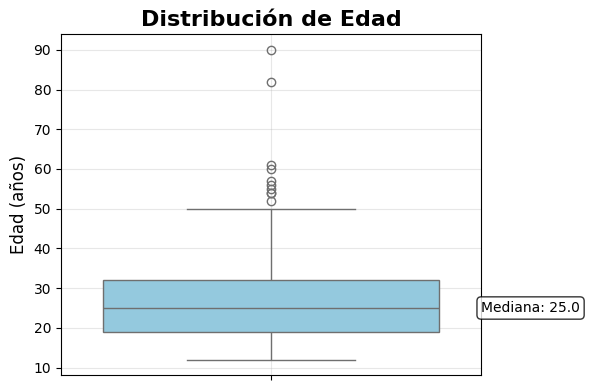

In [17]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=data['edad'], color='skyblue')
plt.title('Distribución de Edad', fontsize=16, fontweight='bold')
plt.ylabel('Edad (años)', fontsize=12)
plt.grid(True, alpha=0.3)
median = data['edad'].median()
q1 = data['edad'].quantile(0.25)
q3 = data['edad'].quantile(0.75)

plt.text(0.5, median, f'Mediana: {median:.1f}', 
         fontsize=10, ha='left', va='center',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


In [18]:
data.to_excel('data_limpias_python.xlsx', index=False)